# California Housing

In [4]:
import pandas as pd

In [5]:
test = pd.read_csv("california_housing_test.csv")
train = pd.read_csv("california_housing_train.csv")

In [6]:
train.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [7]:
california_features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income']
X = train[california_features]
y = train["median_house_value"]

In [8]:
from sklearn.tree import DecisionTreeRegressor

# Define model. Specify a number for random_state to ensure same results each run
model = DecisionTreeRegressor(random_state=1)

# Fit model
model.fit(X, y)

DecisionTreeRegressor(random_state=1)

In [9]:
X_test = test[california_features]
y_test = test["median_house_value"]

In [10]:
from sklearn.metrics import mean_absolute_error

predicted_home_prices = model.predict(X_test)
mae = mean_absolute_error(y_test, predicted_home_prices)
print("Mean Absolute Error: {:,.0f}".format(mae))

Mean Absolute Error: 42,674


## RandomForestRegressor

In [11]:
from sklearn.ensemble import RandomForestRegressor

# Define the model. Set random_state to 1
rf_model = RandomForestRegressor(max_leaf_nodes=100, random_state=1)

# fit your model
rf_model.fit(X, y)

RandomForestRegressor(max_leaf_nodes=100, random_state=1)

In [12]:
predicted_home_prices = rf_model.predict(X_test)
mae = mean_absolute_error(y_test, predicted_home_prices)
print("Mean Absolute Error: {:,.0f}".format(mae))

Mean Absolute Error: 39,740


In [13]:
print(rf_model.score(X_test,y_test))

0.7462967881330734


In [14]:
rf_model = RandomForestRegressor(n_estimators=500)
rf_model.fit(X, y)
predicted_home_prices = rf_model.predict(X_test)
mae = mean_absolute_error(y_test, predicted_home_prices)
print("Mean Absolute Error: {:,.0f}".format(mae))
print(rf_model.score(X_test,y_test))


Mean Absolute Error: 31,930
0.8114939545844662


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

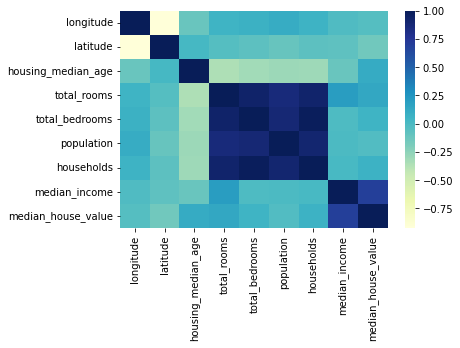

In [ ]:
ax = sns.heatmap(train.corr(), cmap="YlGnBu")

In [24]:
run["graphs/heatmap"].upload(ax.figure)

In [26]:
run["train_dataset"].track_files("california_housing_train.csv")

In [30]:
run["estimator/parameters"] = npt_utils.get_estimator_params(rf_model)

In [44]:
import pickle
s = pickle.dumps(rf_model)
clf2 = pickle.loads(s)

In [45]:
run["estimator/pickled-model"] = npt_utils.get_pickled_model(clf2)

In [51]:
#model_version["model"].upload(clf2)
model_version["validation/dataset"].track_files("california_housing_test.csv")
model_version["validation/acc"] = 0.87
model_version.change_stage("staging")

In [52]:
run.stop()

Shutting down background jobs, please wait a moment...
Done!


Waiting for the remaining 1 operations to synchronize with Neptune. Do not kill this process.


All 1 operations synced, thanks for waiting!


In [16]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

import neptune.new as neptune
import neptune.new.integrations.sklearn as npt_utils

run = neptune.init(
    project="lep511/colab-test-run",
    api_token="eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiJkOTAwNTEyMS05MTEwLTQzYzYtYmYwZi1mMGVmNzA3MjI3YjkifQ==",
    name="regression-example",
    tags=["RandomForestRegressor", "regression"],
)

https://app.neptune.ai/lep511/colab-test-run/e/COL-26
Remember to stop your run once you’ve finished logging your metadata (https://docs.neptune.ai/api-reference/run#.stop). It will be stopped automatically only when the notebook kernel/interactive console is terminated.


In [17]:
parameters = {
    "n_estimators": 90,
    "learning_rate": 0.07,
    "min_samples_split": 2,
    "min_samples_leaf": 5,
}
run["parameters"] = parameters

In [18]:
gbc = GradientBoostingClassifier(**parameters)
X, y = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=28743
)
gbc.fit(X, y)

# Neptune integration with scikit-learn works with
# the regression and classification problems as well.
# Check the user guide in the documentation for more details:
# https://docs.neptune.ai/integrations-and-supported-tools/model-training/sklearn
run["classifier"] = npt_utils.create_classifier_summary(
    gbc, X, X_test, y, y_test
)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


In [20]:
run["train_dataset"].track_files("california_housing_train.csv")
run["test_dataset"].track_files("california_housing_test.csv")

Unexpected error occurred in Neptune background thread: Killing Neptune ping thread. Your run's status will not be updated and the run will be shown as inactive.
Exception in thread NeptunePing:
Traceback (most recent call last):
  File "/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/neptune/new/internal/backends/hosted_neptune_backend.py", line 443, in ping
    self.leaderboard_client.api.ping(
  File "/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/bravado/http_future.py", line 200, in response
    swagger_result = self._get_swagger_result(incoming_response)
  File "/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/bravado/http_future.py", line 124, in wrapper
    return func(self, *args, **kwargs)
  File "/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/bravado/http_future.py", line 300, in _get_swagger_result
    unmarshal_response(
  File "/home/studio-lab-user/.conda/envs/default/lib/python3.9/s

In [ ]:
run.stop()